In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/labeled_data.zip -d /content/data_new


Streaming output truncated to the last 5000 lines.
  inflating: /content/data_new/labeled_data/labels/frame339_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame101_1.txt  
  inflating: /content/data_new/labeled_data/labels/frame3626_2.txt  
  inflating: /content/data_new/labeled_data/labels/frame1550_2.txt  
  inflating: /content/data_new/labeled_data/labels/frame886_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame2350_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame414_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame2315_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame1238_2.txt  
  inflating: /content/data_new/labeled_data/labels/frame451_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame1865_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame2948_2.txt  
  inflating: /content/data_new/labeled_data/labels/frame1026_0.txt  
  inflating: /content/data_new/labeled_data/labels/frame1


## labeler.py


In [ ]:
import os
import shutil

images = os.listdir('/content/data_new/data_new/с черновой отделкой')

for image in images:
  img_name = image.split('.')[0]
  shutil.copyfile(f'/content/data_new/data_new/с черновой отделкой/{image}',f'/content/data_labeled/images/{img_name}_1.jpg')
  with open(f'/content/data_labeled/labels/{img_name}_1.txt', 'w') as file:
    file.write('1 0.5 0.5 1 1')


In [ ]:
!unzip /content/data2.zip -d /content/data2


In [ ]:
!unzip /content/labeled_data.zip -d /content/data_labeled

Archive:  /content/labeled_data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/labeled_data.zip or
        /content/labeled_data.zip.zip, and cannot find /content/labeled_data.zip.ZIP, period.


# YOLO

In [ ]:
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 28.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
model.train(data='/content/data.yaml', epochs=50, imgsz=640)
PATH = '/content/drive/MyDrive/yolo_exp1.pt'
torch.save(model.state_dict(), PATH)

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.9MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

# VGG

In [ ]:
import os
import cv2
from torchvision.utils import make_grid
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from PIL import Image
from __future__ import print_function, division
from torch.utils.data import random_split
import torch
import pandas as pd
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets, models
from google.colab.patches import cv2_imshow
from torch.autograd import Variable
from skimage.color import rgb2gray

import time
import copy

In [ ]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
dataset = torchvision.datasets.ImageFolder(root='/content/data_new/data', 
                                           transform = preprocess)
                                               

images.shape: torch.Size([20, 3, 224, 224])


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

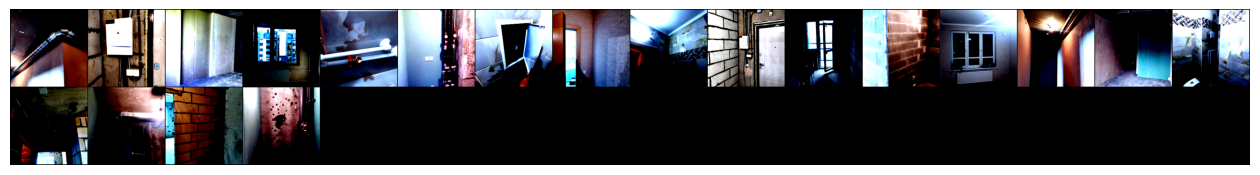

In [ ]:


# prep the train, validation and test dataset
BATCH_SIZE = 20
torch.manual_seed(2021)
val_size = 20
test_size = 20
train_size = len(dataset) - val_size - test_size
train, val, test = random_split(dataset, [train_size, val_size, test_size])

#  train, val and test datasets to the dataloader
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

TRAIN = 'train'
VAL = 'val'
TEST = 'test'
dataset_sizes = {TEST: test_size, TRAIN: train_size, VAL: val_size}
dataloaders = {TEST: test_loader, TRAIN: train_loader, VAL: val_loader}

for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

num_classes = 2

# Load the pretrained model from pytorch
# vgg16 = models.vgg16_bn()
# vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
vgg16 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# print(vgg16.classifier[6].out_features) # 1000


# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

# Newly created modules have require_grad=True by default
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1]  # Remove last layer
features.extend([nn.Linear(num_features, num_classes)])  # Add our layer with 4 outputs
vgg16.classifier = nn.Sequential(*features)  # Replace the model classifier
print(vgg16)


Test before training
Evaluating model
----------
Test batch 0/1

<ipython-input-24-7e4b403d4feb>:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)



Evaluation completed in 0m 14s
Avg loss (test): 0.0394
Avg acc (test): 0.3000
----------


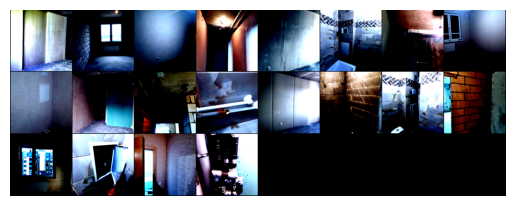

<ipython-input-24-7e4b403d4feb>:98: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)


Ground truth:


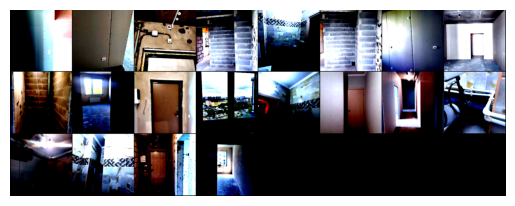

Prediction:


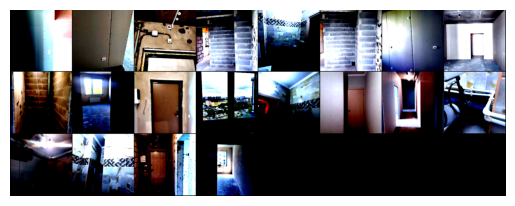

Epoch 0/100
----------
Training batch 0/1.5
Validation batch 0/1

<ipython-input-24-7e4b403d4feb>:195: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)



Epoch 0 result: 
Avg loss (train): 0.0534
Avg acc (train): 0.6786
Avg loss (val): 0.0364
Avg acc (val): 0.3000
----------

Epoch 1/100
----------
Training batch 0/1.5
Validation batch 0/1
Epoch 1 result: 
Avg loss (train): 0.0488
Avg acc (train): 0.7857
Avg loss (val): 0.0304
Avg acc (val): 0.7500
----------

Epoch 2/100
----------
Training batch 0/1.5

KeyboardInterrupt: ignored

In [ ]:

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")
if use_gpu:
    vgg16.cuda()  # .cuda() will move everything to the GPU side

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


def eval_model(vgg, criterion):
    since = time.time()
    avg_loss = 0
    avg_acc = 0
    loss_test = 0
    acc_test = 0

    test_batches = len(dataloaders[TEST])
    print("Evaluating model")
    print('-' * 10)

    for i, data in enumerate(dataloaders[TEST]):
        if i % 100 == 0:
            print("\rTest batch {}/{}".format(i, test_batches), end='', flush=True)

        vgg.train(False)
        vgg.eval()
        inputs, labels = data

        if use_gpu:
            inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
        else:
            inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)

        outputs = vgg(inputs)

        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        loss_test += loss  # loss.data[0]
        acc_test += torch.sum(preds == labels.data)

        del inputs, labels, outputs, preds
        torch.cuda.empty_cache()

    avg_loss = loss_test / dataset_sizes[TEST]
    avg_acc = acc_test / dataset_sizes[TEST]

    elapsed_time = time.time() - since
    print()
    print("Evaluation completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Avg loss (test): {:.4f}".format(avg_loss))
    print("Avg acc (test): {:.4f}".format(avg_acc))
    print('-' * 10)


print("Test before training")
eval_model(vgg16, criterion)


def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out)


# Get a batch of training data
inputs, classes = next(iter(dataloaders[TRAIN]))
show_databatch(inputs, classes)


def visualize_model(vgg, num_images=6):
    was_training = vgg.training

    # Set model for evaluation
    vgg.train(False)
    vgg.eval()

    images_so_far = 0

    for i, data in enumerate(dataloaders[TEST]):
        inputs, labels = data
        size = inputs.size()[0]

        if use_gpu:
            inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
        else:
            inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)

        outputs = vgg(inputs)

        _, preds = torch.max(outputs.data, 1)
        predicted_labels = [preds[j] for j in range(inputs.size()[0])]

        print("Ground truth:")
        show_databatch(inputs.data.cpu(), labels.data.cpu())
        print("Prediction:")
        show_databatch(inputs.data.cpu(), predicted_labels)

        del inputs, labels, outputs, preds, predicted_labels
        torch.cuda.empty_cache()

        images_so_far += size
        if images_so_far >= num_images:
            break

    vgg.train(mode=was_training)  # Revert model back to original training state


visualize_model(vgg16)  # test before training


def train_model(vgg, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(vgg.state_dict())
    best_acc = 0.0

    avg_loss = 0
    avg_acc = 0
    avg_loss_val = 0
    avg_acc_val = 0

    train_batches = len(dataloaders[TRAIN])
    val_batches = len(dataloaders[VAL])

    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print('-' * 10)

        loss_train = 0
        loss_val = 0
        acc_train = 0
        acc_val = 0

        vgg.train(True)

        for i, data in enumerate(dataloaders[TRAIN]):
            if i % 100 == 0:
                print("\rTraining batch {}/{}".format(i, train_batches / 2), end='', flush=True)

            # Use half training dataset
            if i >= train_batches / 2:
                break

            inputs, labels = data

            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)

            optimizer.zero_grad()

            outputs = vgg(inputs)

            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            loss_train += loss
            acc_train += torch.sum(preds == labels.data)

            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()

        print()
        # * 2 as we only used half of the dataset
        avg_loss = loss_train * 2 / dataset_sizes[TRAIN]
        avg_acc = acc_train * 2 / dataset_sizes[TRAIN]

        vgg.train(False)
        vgg.eval()

        for i, data in enumerate(dataloaders[VAL]):
            if i % 100 == 0:
                print("\rValidation batch {}/{}".format(i, val_batches), end='', flush=True)

            inputs, labels = data

            if use_gpu:
                inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
            else:
                inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)

            optimizer.zero_grad()

            outputs = vgg(inputs)

            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)

            loss_val += loss
            acc_val += torch.sum(preds == labels.data)

            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()

        avg_loss_val = loss_val / dataset_sizes[VAL]
        avg_acc_val = acc_val / dataset_sizes[VAL]

        print()
        print("Epoch {} result: ".format(epoch))
        print("Avg loss (train): {:.4f}".format(avg_loss))
        print("Avg acc (train): {:.4f}".format(avg_acc))
        print("Avg loss (val): {:.4f}".format(avg_loss_val))
        print("Avg acc (val): {:.4f}".format(avg_acc_val))
        print('-' * 10)
        print()

        if avg_acc_val > best_acc:
            best_acc = avg_acc_val
            best_model_wts = copy.deepcopy(vgg.state_dict())

    elapsed_time = time.time() - since
    print()
    print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Best acc: {:.4f}".format(best_acc))

    vgg.load_state_dict(best_model_wts)
    return vgg


vgg16 = train_model(vgg16, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=100)
# torch.save(vgg16.state_dict(), '/content/drive/MyDrive/НИР/VGG16_200_images_dataset.pt')

eval_model(vgg16, criterion)



In [ ]:
!unzip 

# MobileNet

In [ ]:
import torchvision.models 

In [ ]:
from torchvision.models import list_models, get_model, get_weight, get_model_weights

In [ ]:
# List available models
all_models = torchvision.models.list_models()
classification_models = list_models(module=torchvision.models)

# Initialize models
# m1 = get_model("mobilenet_v3_small", weights=None)
m2 =torchvision.models.mobilenet_v3_small(weights='DEFAULT')


Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 57.5MB/s]


In [ ]:
m2.classifier

Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=1000, bias=True)
)

In [ ]:
import torch.nn as nn

In [ ]:
classifier = nn.Sequential(
          nn. Linear(in_features=576, out_features=1024, bias=True), 
          nn.Hardswish(),
          nn.Dropout(p=0.2, inplace=True),
          nn.Linear(in_features=1024, out_features=2, bias=True)
        )

In [ ]:
m2.classifier = classifier

In [ ]:
!unzip /content/data2.zip 

Archive:  /content/data2.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/images/
   creating: data/без отделки/
  inflating: __MACOSX/data/._без отделки  
   creating: data/labels/
   creating: data/с отделкой/
  inflating: __MACOSX/data/._с отделкой  
  inflating: data/labeler.py         
  inflating: data/images/9007e27e-afad-4962-8f8d-23c188298f4e.jpg  
  inflating: __MACOSX/data/images/._9007e27e-afad-4962-8f8d-23c188298f4e.jpg  
  inflating: data/images/b624ae73-a7c9-4d18-840d-9d4289bddd08.jpg  
  inflating: __MACOSX/data/images/._b624ae73-a7c9-4d18-840d-9d4289bddd08.jpg  
  inflating: data/images/photo_2022-12-01_17-56-55 (2).jpg  
  inflating: __MACOSX/data/images/._photo_2022-12-01_17-56-55 (2).jpg  
  inflating: data/images/5837ade4-d644-4a3a-b33b-82969be52f52.jpg  
  inflating: __MACOSX/data/images/._5837ade4-d644-4a3a-b33b-82969be52f52.jpg  
  inflating: data/images/

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
   creating: data/без отделки/
replace __MACOSX/data/._без отделки? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
   creating: data/с отделкой/
replace __MACOSX/data/._с отделкой? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: data/без отделки/9007e27e-afad-4962-8f8d-23c188298f4e.jpg  
replace __MACOSX/data/без отделки/._9007e27e-afad-4962-8f8d-23c188298f4e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: data/без отделки/b624ae73-a7c9-4d18-840d-9d4289bddd08.jpg  
replace __MACOSX/data/без отделки/._b624ae73-a7c9-4d18-840d-9d4289bddd08.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/data/без отделки/._b624ae73-a7c9-4d18-840d-9d4289bddd08.jpg  
  inflating: data/без отделки/5837ade4-d644-4a3a-b33b-82969be52f52.jpg  
  inflating: __MACOSX/data/без отделки/._5837ade4-d644-4a3a-b33b-82969be52f52.jpg  
  inflating:

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/data/images/02c93643-9c1a-4d46-84ad-18ac2b3caf42.jpg')

In [ ]:
import torch
import torchvision
import numpy as np

In [ ]:
data = torchvision.datasets.ImageFolder(root = '/content/data',
                                        transform =  torchvision.transforms.Compose([np.array, torch.Tensor]))#, 
                                        # transform = torchvision.models.MobileNet_V3_Small_Weights.IMAGENET1K_V1.transforms)

In [ ]:
dataloader = torch.utils.data.DataLoader(data, batch_size=1)

In [ ]:
for i, (image, labels) in (enumerate(dataloader)):
        
        # forward pass
        outputs = m2(torch.transpose(image, 1,3))

KeyboardInterrupt: ignored